# Dataset Simulation: Weight Loss 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Preliminary-Measurements" data-toc-modified-id="Preliminary-Measurements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preliminary Measurements</a></span><ul class="toc-item"><li><span><a href="#Body-Mass-Index-(BMI)" data-toc-modified-id="Body-Mass-Index-(BMI)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Body Mass Index (BMI)</a></span></li><li><span><a href="#Basal-Metabolic-Rate-(BMR)" data-toc-modified-id="Basal-Metabolic-Rate-(BMR)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Basal Metabolic Rate (BMR)</a></span></li><li><span><a href="#Total-Daily-Energy-Expenditure-(TDEE)" data-toc-modified-id="Total-Daily-Energy-Expenditure-(TDEE)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Total Daily Energy Expenditure (TDEE)</a></span></li><li><span><a href="#Weight-Goal-and-Calorie-Deficit" data-toc-modified-id="Weight-Goal-and-Calorie-Deficit-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Weight Goal and Calorie Deficit</a></span></li></ul></li><li><span><a href="#Time" data-toc-modified-id="Time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Time</a></span><ul class="toc-item"><li><span><a href="#Coding-Time-Columns" data-toc-modified-id="Coding-Time-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Coding Time Columns</a></span></li></ul></li><li><span><a href="#Calorie-Intake" data-toc-modified-id="Calorie-Intake-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calorie Intake</a></span><ul class="toc-item"><li><span><a href="#Coding-Calorie-Intake-Column" data-toc-modified-id="Coding-Calorie-Intake-Column-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Coding Calorie Intake Column</a></span></li></ul></li><li><span><a href="#Calorie-Output" data-toc-modified-id="Calorie-Output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calorie Output</a></span><ul class="toc-item"><li><span><a href="#TDEE" data-toc-modified-id="TDEE-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>TDEE</a></span><ul class="toc-item"><li><span><a href="#Creating-TDEE-Column" data-toc-modified-id="Creating-TDEE-Column-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Creating TDEE Column</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Weight-Loss" data-toc-modified-id="Weight-Loss-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Weight Loss</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting random seed for reproducible results.
np.random.seed(10)

## Introduction

This project simulates a dataset created by a woman - let's call her Zoe - who decided to track her weight loss efforts in a spreadsheet over the course of a calender year from 01/01/18 - 31/12/18. As a new years resolution she decided to begin eating less and exercising more in order to lose weight and be more healthy overall. To set herself up for success, she did a lot of research beforehand and was very fastidious in logging her calorie intake, estimated calorie output and actual weight loss.  

At its most basic, weight loss comes down to burning more calories you consume but there are several factors that can contribute to its complexity such as: (https://www.niddk.nih.gov/health-information/weight-management/adult-overweight-obesity/factors-affecting-weight-health)

- Genetics
- Race
- Sex
- Age
- Diet
- Physical activity
- Environment
- Medical issues

Zoe is a 30 year old white Irish woman who lives in the suburbs and works an office job. She has a moderately balanced diet (if perhaps a bit overindulgent!), exercises very little, and does not have any known medical issues that would have a direct affect on her weight. Since there are no glaring physical or environmental factors that should hinder her weight loss efforts, she believes that she can start to lose weight by making some slight lifestyle adjustments rather than any drastic changes. Fad diets or dietary supplements that promise quick weight-loss results are difficult to stick to long-term and can potentially be bad for one's health (https://www.indi.ie/fact-sheets/healthy-eating,-healthy-weight-and-dieting/436-the-truth-about-fad-diets-and-dietary-supplements-for-weight-loss.html) so Zoe decides to lower her calorie intake, without changing the type food she eats too much, and adds in a bit of exercise. 

There are some preliminary measurements that are useful to know before beginning any weight loss regimen:

- Body Mass index (BMI)
- Basal Metabolic Rate (BMR)
- Total Daily Energy Expenditure (TDEE)
- Weight goal and estimated calorie deficit

<br>

## Preliminary Measurements


### Body Mass Index (BMI) 

BMI is a guideline used to determine if a person is underweight, an optimal weight, overweight or obese based on their height and weight. (https://en.wikipedia.org/wiki/Body_mass_index) The formula to determine BMI is **kg/m<sup>2</sup>** and the result categorises a person as follows:

<img src='https://files.prokerala.com/health/images/bmi-category.png' style='width: 300px'>


Based on Zoe's starting weight of 80kg and height of 175cm, her BMI is calculated below as 26.1, placing her in the overweight category and further confirming her desire to lose weight.

In [2]:
# Height (cm) and starting weight (kg) variables
height = 175
starting_weight = 80

# BMI function
def bmi(weight, height):
    result = weight/(height/100)**2
    return result

# Starting BMI
starting_bmi = bmi(starting_weight, height)
print("Starting BMI:", round(starting_bmi, 2) )

Starting BMI: 26.12


<br>

### Basal Metabolic Rate (BMR)

BMR is a person's estimated energy expenditure over the course of a day when they are at rest.(https://en.wikipedia.org/wiki/Basal_metabolic_rate) In other words, it is the number of calories burned by the body just performing basic functions like breathing or circulating blood. BMR is determined by a person's  weight, height, age and sex. There are many online calculators where a person can input these values to get an approximation of their BMR. Some use the Mifflin-St Jeor equation while others use the Harris-Benedict equation. (https://tdeecalculator.net/ ; https://www.calculator.net/bmr-calculator.html#; https://www.thecalculatorsite.com/health/bmr-calculator.php; https://www.bodybuilding.com/fun/bmr_calculator.htm ) The Mifflin-St Jeor equation is an updated version of the 100 year old Harris-Benedict equation and is considered to be more accurate to modern life (https://en.wikipedia.org/wiki/Harris%E2%80%93Benedict_equation) so Zoe decides to use this equation to calculate her BMR. The formula is as follows:

**<center>10 * weight(kg) + 6.25 * height(cm) - 5 * age(years) + s</center>**

where s represents sex and is a value of 5 for a male and -161 for a female.(https://www.omnicalculator.com/health/bmr) Zoe's BMR is calculated below with this formula as 1583 calories, meaning she burns approximately this number of calories at minimum every day.

In [3]:
# Variables to determine BMR.
age = 30
male = 5
female = -161

# BMR function
def bmr(weight, height, age, sex):
    result = 10 * weight + 6.25 * height - 5 * age + sex
    return result

# Calculating and displaying starting BMR.
starting_bmr = bmr(starting_weight, height, age, female)
print('Starting BMR: ', round(starting_bmr), 'calories.')

Starting BMR:  1583 calories.


<br>

### Total Daily Energy Expenditure (TDEE)

TDEE is a person's estimated energy expenditure when daily activity is taken into account.(https://tdeecalculator.net/) It is calculated by taking a person's BMR and multiplying it by a number that represents their activity level, ranging from sedentary to athlete. The image below shows the different activity multipliers that can be used to calculate TDEE: (https://www.thecalculatorsite.com/health/bmr-calculator.php)

<img src='https://i.imgur.com/J6Zydr4.png' style='width: 400px'>


TDEE thus represents the number of calories a person should consume if they want to maintain their current weight and so to lose weight they should aim to undercut this figure. Zoe considers herself to be quite sedentary as she does not exercise much and has a job where she is seated most of the day and so her TDEE is estimated below to be 1899 calories.

In [4]:
# TDEE function
def tdee(weight):
    result = bmr(weight, height, age, female) * 1.2
    return result
         
# Calculating and displaying starting TDEE
starting_tdee = tdee(starting_weight)
print('Starting TDEE:', round(starting_tdee), 'calories.')

Starting TDEE: 1899 calories.


<br>

### Weight Goal and Calorie Deficit

With a TDEE of 1899, Zoe needs to decide what kind of calorie deficit she wishes to make. She aims to lose weight in a slow, sustainable manner in the hopes of losing 12kg over the course of the year. It is often estimated that to lose a pound (0.454kg) of fat, one needs to burn about 3500 calories, (https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/calories/art-20048065) but this should only be taken as a guideline, not a fact as it is, at the very least, an over-simplication.  (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4035446/) However, it serves as a useful starting point for someone looking to estimate their calorie deficit goals and so Zoe works her calculations based on a 3500 calorie deficit being equivalent to 454g weight loss. 

To reach her target of a 12kg loss in the year, Zoe will need to lose about 0.231kg every week. To simplify her calculations, she decides to follow the 3500 calorie deficit every fortnight, which should allow her to lose about 0.227g per week. As calculated below, this means she needs to cut her daily calorie intake by about 250 calories below her TDEE and so sets her daily allowance to 1649 calories

In [5]:
# Target total weight loss in grams
target = 12

# Target weekly weight loss
weekly_target = target/52
print('Target weekly weight loss:', str(round(weekly_target, 3)) + 'kg')

# Estimated number of kg per calorie based on 3500cal = 0.454kg
kg_per_cal = 0.454/3500 

# Function converting calories to kg 
def cal_to_kg(calories):
    kg = calories * kg_per_cal
    return kg

# Weekly and daily calorie deficits
weekly_cal_deficit = 1750
daily_cal_deficit = weekly_cal_deficit/7

# Weekly weight loss, daily calorie deficit and daily calorie allowance targets
print('')
print('Estimated weekly weight loss based on calorie deficit of', str(weekly_cal_deficit) + ':', str(cal_to_kg(weekly_cal_deficit)) + 'kg')
print('')
print('Daily calorie deficit required:', round(daily_cal_deficit))
print('')
print('Daily calorie allowance:', round(starting_tdee - daily_cal_deficit))

Target weekly weight loss: 0.231kg

Estimated weekly weight loss based on calorie deficit of 1750: 0.227kg

Daily calorie deficit required: 250

Daily calorie allowance: 1649


It should be noted that not all calories are created equal. Zoe could eat at a calorie deficit consisting entirely of junk food and still lose weight but this, of course, would not be healthy. She aims each day to follow the guide below when dividing her calorie allowance: (https://www.healthline.com/nutrition/best-macronutrient-ratio#calorie-vs-calorie)

    - 45-65% carbohydrates
    - 20-35% fats
    - 10-35% proteins 
    
In her spreadsheet, however, she focuses on calories in and out rather than specific macronutrients but she is generally quite good at sticking to the above ratios in order to have a balanced diet.

## Time

With her goals set, the next thing Zoe had to decide is how often to track her progress. She finds a lot of conflicting information online about how regularly one should weigh themselves when trying to lose weight. Some believe that weighing in too frequently can cause anxiety (https://health.clevelandclinic.org/why-you-shouldnt-weigh-yourself-every-single-day/) or discouragement (https://www.medicinenet.com/to_weigh__or_not_to_weighthat_is_the_question/views.htm) as weight fluctuations in the short-term can be quite unpredictable due to factors such as hydration or what was last eaten. However, some studies have shown that higher weighing frequ0ency is associated with greater weight loss, (https://link.springer.com/article/10.1207/s15324796abm3003_5) less weight regain, (https://link.springer.com/article/10.1186/1479-5868-5-54) and is not associated with adverse psychological outcomes like anxiety (https://onlinelibrary.wiley.com/doi/full/10.1002/oby.20946). It really comes down to personal preference and what an individual feels works well for them. (https://blog.myfitnesspal.com/how-often-should-you-weigh-yourself/)

Zoe is interested in collecting as much data as possible to track her weight loss efforts and so decides to follow a guide that suggests she weigh herself first thing in the morning every day (https://www.consumerreports.org/scales/the-best-time-to-weigh-yourself/) as she finds the consistent feedback helps her to stay on track and keep herself accountable. 


### Coding Time Columns
The pandas *date_range* function was used to create a range of dates from 01/01/18 - 31/12/18 to track Zoe's daily inputs. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.weekday.html This is used to create the first column of the dataset.
   

In [6]:
# Defining start and end dates.
start = '2018-01-01'
end = '2018-12-31'

# Creating the date range.
date = pd.date_range(start, end, freq='D')

# Creating the dataframe and first column: date.
df = pd.DataFrame({'date': date})

# Printing current dataset.
df

,date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
360,2018-12-27
361,2018-12-28
362,2018-12-29
363,2018-12-30


Another column containing the day of the week is added to the dataset (https://stackoverflow.com/a/30222759) so Zoe can observe any behavioural patterns that occur on particular days, such as days she tends to indulge a bit more or days she's more likely to exercise. She believes this will help her to be more conscious of her habits, both good and bad. For this reason, the column is converted from an object datatype to a categorical datatype (https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) to aid in categorical statistical research and plotting. (https://stackoverflow.com/questions/30601830/when-to-use-category-rather-than-object) 

In [7]:
# Creating second column: days.
df['day'] = df['date'].dt.day_name()

# Changing datatype from object to categorical.
df['day'] = df['day'].astype('category')

# Printing current dataset.
df

,date,day
0,2018-01-01,Monday
1,2018-01-02,Tuesday
2,2018-01-03,Wednesday
3,2018-01-04,Thursday
4,2018-01-05,Friday
...,...,...
360,2018-12-27,Thursday
361,2018-12-28,Friday
362,2018-12-29,Saturday
363,2018-12-30,Sunday


Dates and days of the week could be considered to be discrete uniform distributions as there is a finite number of values for each and no instance is more likely to occur than any other. The plot below demonstrates this. 

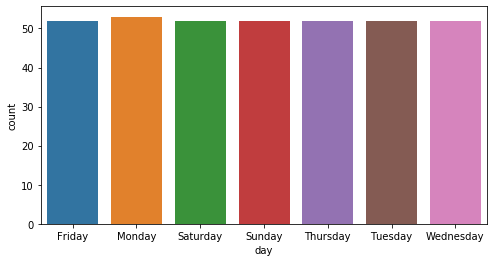

In [8]:
# Plotting day distributiions.
plt.figure(figsize=(8, 4))
sns.countplot(df.day, orient='h')
plt.show()

## Calorie Intake

There are many apps available that allow people to track their calorie intake, such as [MyFitnessPal](https://www.myfitnesspal.com/), [Lose It!](https://loseit.com/) and [FatSecret](https://www.fatsecret.com/). Each of these has a growing database of user-generated calorie values for various food items and provides calorie goals, support and tips for people trying to lose weight. Zoe decided to use the [MyFitnessPal](https://www.myfitnesspal.com/) app, to log everything she eats as it has the largest food database available in a diet tracker. (https://www.healthline.com/nutrition/5-best-calorie-counters#section2) The app provides her with a calorie total at the end of every day that she then logs into her spreadsheet. Earlier she had calculated that her calorie intake should be about 1649 calories per day for steady weight loss. She decides not to be too strict with herself about sticking to a specific daily goal but aims to keep this figure in mind as an average calorie amount in the long-term, i.e. if she exceeds 1649 calories a few days per week she'll try to go under that amount on other days.


### Coding Calorie Intake Column

Working with 1649 calories as the average, and allowing for a 10% variance in calorie amounts, my first thought was to use the *np.random.normal* function to simulate calorie intake. However, with this function there is no way to set a limit on the lower end of the scale. As the plot below demonstrates, values may sometimes dip below 1200 calories. It is not healthy to eat fewer than 1200 calories in a day as it would be very difficult to get the nutrition the body needs in such a small amount. (https://www.everydayhealth.com/weight/can-more-calories-equal-more-weight-loss.aspx) Therefore a minimum calorie threshold needs to be established as Zoe never eats below 1200 calories.

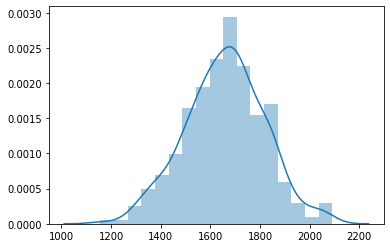

In [9]:
# Calorie intake normal distribution.
cal_in_normal = np.random.normal(1649, 165, 365)
sns.distplot(cal_in_normal)

The *np.random.randint* function does allow a minimum calorie value to be set but uses a uniform distribution, which would not be representative of a person trying to stick to an average daily calorie goal. 

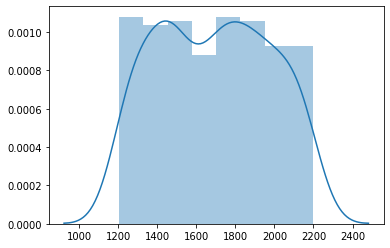

In [10]:
# Calorie intake uniform distribution.
cal_in_uniform = np.random.randint(1200, 2200, 365)
sns.distplot(cal_in_uniform)
plt.show()

The solution seemed to be using what is called a truncated normal distribution,(https://en.wikipedia.org/wiki/Truncated_normal_distribution) which allows upper and lower limits to be set and the data within this range is normally distributed. The function created below  uses the *stats.truncnorm* function (https://stackoverflow.com/a/18444710; https://stackoverflow.com/a/53948014; https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.truncnorm.html; https://stackoverflow.com/a/37411711) to generate 365 random numbers in a 1000 calorie range that are:

- no less than 1200. 
- no greater than 2200. 
- centre around an average value of 1649 with a standard deviation of 165 calories.

The results are converted to integer values as calories are such a small unit of measurement anyway that no one would realistically track decimal amounts. The array below shows the output of the function and the numbers look to be an accurate representation of what is required. 

In [11]:
# Creating calorie intake function.    
def cal_in():
    low = 1200
    high = 2200
    mu = 1649
    sigma = 165
    x = stats.truncnorm((low - mu) / sigma, (high - mu) / sigma, loc=mu, scale=sigma)
    cal_val = x.rvs(365).astype(int)
    return cal_val

# Printing cal_in array.
cal_in()

array([1577, 1707, 1460, 1822, 1562, 1835, 1848, 1662, 1755, 1642, 1548,
       1717, 1777, 1534, 1798, 1653, 1670, 1557, 1476, 1948, 1533, 1809,
       1622, 1432, 1851, 1782, 1520, 1671, 1685, 1557, 1895, 1783, 1356,
       1598, 1589, 1543, 1691, 1747, 1605, 1656, 1839, 1545, 1761, 1542,
       1743, 1849, 1757, 1655, 1356, 1770, 1397, 1831, 1470, 1749, 1694,
       1720, 1471, 1655, 1800, 1568, 1833, 1563, 1622, 1592, 1784, 1981,
       1768, 1959, 1525, 1835, 1607, 1484, 1692, 1691, 1656, 1886, 1735,
       1853, 1972, 1652, 1900, 1644, 1626, 1329, 1464, 1739, 1845, 1378,
       1623, 1452, 1487, 1692, 1989, 1677, 1452, 1659, 1419, 1746, 1457,
       1756, 1771, 1406, 1640, 1625, 1525, 1709, 1515, 1687, 1514, 1531,
       1637, 1438, 1512, 1667, 1450, 1531, 1784, 1599, 1717, 1769, 1797,
       1523, 1761, 1838, 1562, 1638, 1523, 1859, 1925, 1519, 1362, 1677,
       1481, 1435, 1738, 1774, 1716, 1809, 1899, 1738, 1604, 1471, 1457,
       1425, 1633, 1837, 1727, 1588, 1760, 1799, 15

The plot below shows the distribution of these values, and the majority look to fall between 1500-1900 calories.

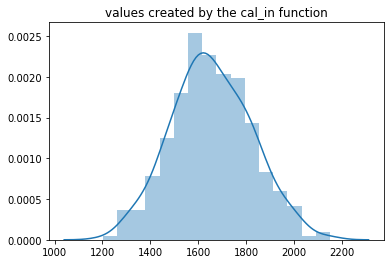

In [12]:
# Plotting the distribution of cal_in
sns.distplot(cal_in()) 
plt.title('values created by the cal_in function')
plt.show()

Like many people,  Zoe tends to consume more calories over the weekend than during the week. (https://www.webmd.com/diet/features/avoid-weekend-weight-gain#1) Being aware of this tendency, she tries as best she can to stick closer to the 1649 calorie budget during the week. Thus, the sigma value in the *cal_in* function above was set to just 10% of the mean to keep values fairly centred around 1649. At the weekend she can potentially consume between 200-300 calories over her target calorie amount per day. When creating the calories_in column below, the days Saturday and Sunday get a random integer between 200-300 added to the value that was generated by the *cal_in* function. (https://note.nkmk.me/en/python-numpy-where/;  https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/)

In [13]:
# Creating extra random calorie amounts to be added to weekend days.
extra_cal = np.random.randint(200, 300)

# Creating calories_in column with weekend values adjusted.
df['calories_in'] = np.where((((df['day'])=='Saturday') | ((df['day'])=='Sunday')), cal_in() + extra_cal, cal_in())

# Printing current dataset.
df

,date,day,calories_in
0,2018-01-01,Monday,1524
1,2018-01-02,Tuesday,1705
2,2018-01-03,Wednesday,1392
3,2018-01-04,Thursday,1855
4,2018-01-05,Friday,1705
...,...,...,...
360,2018-12-27,Thursday,1486
361,2018-12-28,Friday,1817
362,2018-12-29,Saturday,1815
363,2018-12-30,Sunday,1785


Below we can see how these extra weekend calories affect her average calorie amount over the year. Before making the adjustment for weekends, her intake is below the average target of 1649 but with the few extra calories on weekends, her average goes above the target with nearly a 100 calorie difference between the two values.

In [14]:
print('Average calorie intake before adjusting for weekends:', cal_in().mean())
print('')
print('Average calorie intake with adjustment for weekends:', df.calories_in.mean())

Average calorie intake before adjusting for weekends: 1627.9972602739726

Average calorie intake with adjustment for weekends: 1725.6191780821919


<br>

## Calorie Output

To help her reach her goal and be more healthy overall, Zoe decides to add some exercise into her routine. Her calorie output is then a combination of her TDEE and calories burned from exercise. These figures are calculated for each day and combined into a column that denote her calorie output for each day.

### TDEE

Zoe's starting TDEE was previously calculated to be about 1899 calories. As this figure is based on her BMR, which itself is based on her weight, it will change as her weight fluctuates. With these fluctuations, it may be expected that her calorie intake target of 1649 calories should also be changeable as the deficit will become less effective if her TDEE falls. However, when calculating what her TDEE might be if she reaches a 12kg loss (below), the value still exceeds her target calorie intake at 1755 calories. Thus, while her weight loss might slow down, she should still be able to maintain an overall calorie deficit.

In [15]:
# Projected TDEE based on goal weight
print('Projected TDEE for weight of 68kg:', tdee(68))

Projected TDEE for weight of 68kg: 1755.3


#### Creating TDEE Column

When creating the TDEE column below, (https://stackoverflow.com/a/16327135; https://stackoverflow.com/a/36459273) only the first row value is filled based on her starting weight. The rest of the rows will be populated in a later section once the weight column is created as each one is based on the weight measurement of the previous day.

In [16]:
# Creating TDEE column with just first row filled.
df['tdee'] = np.nan
df.loc[0, 'tdee'] = starting_tdee
df

,date,day,calories_in,tdee
0,2018-01-01,Monday,1524,1899.3
1,2018-01-02,Tuesday,1705,NaN
2,2018-01-03,Wednesday,1392,NaN
3,2018-01-04,Thursday,1855,NaN
4,2018-01-05,Friday,1705,NaN
...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN
361,2018-12-28,Friday,1817,NaN
362,2018-12-29,Saturday,1815,NaN
363,2018-12-30,Sunday,1785,NaN


### Exercise

Exercise is not as important to weight loss as diet, and indeed several studies have shown that if one only increases their physical activity without changing the way they eat, weight loss results are generally not substantial. https://www.vox.com/2016/4/28/11518804/weight-loss-exercise-myth-burn-calories However, exercise is important for overall physical health and when combined with a good diet, can help bolster weight loss by burning off some extra calories. A mixture of aerobic, strength and flexibility exercise is generally recommended for healthy weight loss (https://www.verywellfit.com/types-of-exercise-for-weight-loss-3495992) so Zoe decides to incorporate the following activities into her routine:

- Walking for aerobic exercise.
- Strength training at home with free weights and bodyweight exercises such as squats and lunges.
- Regular yoga classes at a local yoga centre for flexibility. 

She uses a [Fitbit Surge](https://www.fitbit.com/ie/home) to track the calories she burns while exercising. This wearable fitness device measures activity and heart rate and combines these with a person's BMR to estimate the number of calories burned during exercise. (https://help.fitbit.com/articles/en_US/Help_article/1141#calories) Fitness trackers have a reputation of over-estimating calories burned (https://www.bbc.com/news/uk-wales-47013454) but the Fitbit Surge has been found to be one of the more accurate trackers with an error rate of just over 25%. (https://www.businessinsider.com/how-accurate-is-fitbit-calories-burned?r=US&IR=T) Even though we have no way of knowing exactly how many calories are burned, not just with exercise but TDEE also, the margin of error will be dealt with in a later **section**.  


#### Coding Exercise Column



Exercise and calories burned: https://www.sciencealert.com/how-to-calculate-calories-burned-met-value-exercise?perpetual=yes&limitstart=1

She tries to do some form of exercise several days per week but there are some days she doesn't have the time or motivation to exercise.

In [17]:
# List of exercise activities.
# https://stackoverflow.com/a/52923373
activities = ["none", "walk", "strength", "yoga"]

# Separating out days of the week.
sat = df['day'] == 'Saturday'
sun = df['day'] == 'Sunday'
mon = df['day'] == 'Monday'
tue = df['day'] == 'Tuesday'
wed = df['day'] == 'Wednesday'
thu = df['day'] == 'Thursday'
fri = df['day'] == 'Friday'

# Setting exercise probabilities for each day
psat = np.random.choice(activities, size = (365), p=[0, 0.5, 0.2, 0.3])
psun = np.random.choice(activities, size = (365), p=[0, 0.75, 0.25, 0])
pmon = np.random.choice(activities, size = (365), p=[0.4, 0.5, 0.1, 0])
ptue = np.random.choice(activities, size = (365), p=[0.15, 0.25, 0.1, 0.5])
pwed = np.random.choice(activities, size = (365), p=[0.3, 0.5, 0.2, 0])
pthu = np.random.choice(activities, size = (365), p=[0.3, 0.2, 0, 0.5])
pfri = np.random.choice(activities, size = (365), p=[0.2, 0.4, 0.4, 0])

# Creating exercise column
df['exercise'] = np.select([sat, sun, mon, tue, wed, thu, fri], [psat, psun, pmon, ptue, pwed, pthu, pfri], default=np.nan)

# Change from object type to categorical type.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df['exercise'] = df['exercise'].astype('category')

df

,date,day,calories_in,tdee,exercise
0,2018-01-01,Monday,1524,1899.3,walk
1,2018-01-02,Tuesday,1705,NaN,yoga
2,2018-01-03,Wednesday,1392,NaN,walk
3,2018-01-04,Thursday,1855,NaN,walk
4,2018-01-05,Friday,1705,NaN,strength
...,...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN,yoga
361,2018-12-28,Friday,1817,NaN,none
362,2018-12-29,Saturday,1815,NaN,strength
363,2018-12-30,Sunday,1785,NaN,strength


Below is a function that tracks the estimated calories burned by exercising. Zoe exercises most days per week and averages at about 45 minutes per session. She uses her fitbit (https://www.fitbit.com/ie/home) to approximate the number of calories burned during each exercise session and logs that into her spreadsheet.  

In [18]:
# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function

def exercise_cals(row):
    if row['exercise'] == 'yoga':
        return int(np.random.normal(150, 50))
    if row['exercise'] == 'walk':
        return int(np.random.normal(250, 50))
    if row['exercise'] == 'strength':
        return int(np.random.normal(300))
    if row['exercise'] == 'none':
        return 0
    
df['exercise_cals'] = df.apply(lambda row: exercise_cals(row), axis = 1)
df

,date,day,calories_in,tdee,exercise,exercise_cals
0,2018-01-01,Monday,1524,1899.3,walk,239
1,2018-01-02,Tuesday,1705,NaN,yoga,145
2,2018-01-03,Wednesday,1392,NaN,walk,289
3,2018-01-04,Thursday,1855,NaN,walk,267
4,2018-01-05,Friday,1705,NaN,strength,300
...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN,yoga,121
361,2018-12-28,Friday,1817,NaN,none,0
362,2018-12-29,Saturday,1815,NaN,strength,300
363,2018-12-30,Sunday,1785,NaN,strength,301


Total calorie output is the sum of tdee and exercise_cals to figure out the total estimated number of calories burned each day

In [19]:
# df['calories_out'] = df['exercise_cals'] + df['tdee']
df['calories_out'] = np.nan
df.loc[0, 'calories_out'] = df.loc[0, 'tdee'] + df.loc[0, 'exercise_cals']
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out
0,2018-01-01,Monday,1524,1899.3,walk,239,2138.3
1,2018-01-02,Tuesday,1705,NaN,yoga,145,NaN
2,2018-01-03,Wednesday,1392,NaN,walk,289,NaN
3,2018-01-04,Thursday,1855,NaN,walk,267,NaN
4,2018-01-05,Friday,1705,NaN,strength,300,NaN
...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN,yoga,121,NaN
361,2018-12-28,Friday,1817,NaN,none,0,NaN
362,2018-12-29,Saturday,1815,NaN,strength,300,NaN
363,2018-12-30,Sunday,1785,NaN,strength,301,NaN


Calorie difference

In [20]:
#df['cal_dif'] = df['calories_out'] - df['calories_in']
df['cal_dif'] = np.nan
df.loc[0, 'cal_dif'] = df.loc[0, 'calories_in'] - df.loc[0, 'calories_out']
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out,cal_dif
0,2018-01-01,Monday,1524,1899.3,walk,239,2138.3,-614.3
1,2018-01-02,Tuesday,1705,NaN,yoga,145,NaN,NaN
2,2018-01-03,Wednesday,1392,NaN,walk,289,NaN,NaN
3,2018-01-04,Thursday,1855,NaN,walk,267,NaN,NaN
4,2018-01-05,Friday,1705,NaN,strength,300,NaN,NaN
...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN,yoga,121,NaN,NaN
361,2018-12-28,Friday,1817,NaN,none,0,NaN,NaN
362,2018-12-29,Saturday,1815,NaN,strength,300,NaN,NaN
363,2018-12-30,Sunday,1785,NaN,strength,301,NaN,NaN


The number of kg lost is based on the function created in section 2.4


A random amount is added to each kg_lost value to account for normal weight variations that might result from either calorie in/out miscalculations or other factors like Zoe's hydration at the time. I decided to base these figures on an average of 0.037kg, which is how much weight would be lost daily based on her goal of a 0.25g weekly or roughly 1kg monthly, and also made them normally distributed close to the average. The value can either be positive or negative, denoted by multiplying the randomly generated number by either -1 or 1, which is also randomly generated. This makes the data more realistic as, even if Zoe has a day where her calorie output far exceeds her calorie intake, that is not always immediately reflected on the scale.

In [21]:
#df['kg_lost'] = cal_to_kg(df['cal_dif'])
df['kg_lost'] = np.nan
df.loc[0, 'kg_lost'] = cal_to_kg(df.loc[0, 'cal_dif']) + (np.random.choice((-1, 1)) * np.random.normal(0.0357, 0.01))
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out,cal_dif,kg_lost
0,2018-01-01,Monday,1524,1899.3,walk,239,2138.3,-614.3,-0.055151
1,2018-01-02,Tuesday,1705,NaN,yoga,145,NaN,NaN,NaN
2,2018-01-03,Wednesday,1392,NaN,walk,289,NaN,NaN,NaN
3,2018-01-04,Thursday,1855,NaN,walk,267,NaN,NaN,NaN
4,2018-01-05,Friday,1705,NaN,strength,300,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN,yoga,121,NaN,NaN,NaN
361,2018-12-28,Friday,1817,NaN,none,0,NaN,NaN,NaN
362,2018-12-29,Saturday,1815,NaN,strength,300,NaN,NaN,NaN
363,2018-12-30,Sunday,1785,NaN,strength,301,NaN,NaN,NaN


In [22]:
#['weight'] = np.nan
#df['weight'].iloc[[0]] = 80 - df['kg_lost']
#df

#weight = 80
#df['weight'] = weight - df['kg_lost']
#df



df['weight'] = np.nan
df.loc[0, 'weight'] = starting_weight + df.loc[0, 'kg_lost']
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out,cal_dif,kg_lost,weight
0,2018-01-01,Monday,1524,1899.3,walk,239,2138.3,-614.3,-0.055151,79.944849
1,2018-01-02,Tuesday,1705,NaN,yoga,145,NaN,NaN,NaN,NaN
2,2018-01-03,Wednesday,1392,NaN,walk,289,NaN,NaN,NaN,NaN
3,2018-01-04,Thursday,1855,NaN,walk,267,NaN,NaN,NaN,NaN
4,2018-01-05,Friday,1705,NaN,strength,300,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN,yoga,121,NaN,NaN,NaN,NaN
361,2018-12-28,Friday,1817,NaN,none,0,NaN,NaN,NaN,NaN
362,2018-12-29,Saturday,1815,NaN,strength,300,NaN,NaN,NaN,NaN
363,2018-12-30,Sunday,1785,NaN,strength,301,NaN,NaN,NaN,NaN


In [23]:
# BMI

starting_bmi = bmi(starting_weight, height/100)
df['bmi'] = np.nan
df.loc[0, 'bmi'] = bmi(df.loc[0, 'weight'], height)
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1524,1899.3,walk,239,2138.3,-614.3,-0.055151,79.944849,26.10444
1,2018-01-02,Tuesday,1705,NaN,yoga,145,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,Wednesday,1392,NaN,walk,289,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,Thursday,1855,NaN,walk,267,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,Friday,1705,NaN,strength,300,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,NaN,yoga,121,NaN,NaN,NaN,NaN,NaN
361,2018-12-28,Friday,1817,NaN,none,0,NaN,NaN,NaN,NaN,NaN
362,2018-12-29,Saturday,1815,NaN,strength,300,NaN,NaN,NaN,NaN,NaN
363,2018-12-30,Sunday,1785,NaN,strength,301,NaN,NaN,NaN,NaN,NaN


## Weight Loss

Could I do some kind of probability distribution that makes total weight go up/down?

Or have one column with weight lost daily/weekly and then add/subtrct that to total weight in another column?

Weight lost every week: Say I lose an average of 0.5kg per week with a standard deviation of 0.25 and over a normal distribution.

Or with daily say it's 0.1kg per day average with a sd of 0.05g

No! I should base the weight loss on the other variables - exercise and calories - with a random amount added or subtracted as weight loss is not exact (is this noise?)


To account for daily fluctuations, weight loss or gain will not only depend on calories in/out but will also include a random variant. 


In [24]:
# TDEE function
# only weight will change in this calculation

#weight = df['weight'].iloc[[0]]

#def tdee(weight):
 #   bmr = 10 * weight + 6.25 * 175 - 5 * 30 -161
  #  result = bmr * 1.2
   # return result

#df['tdee'] = tdee(weight)
#df

In [25]:
# https://stackoverflow.com/a/34856727 
for i in range(1, len(df)):
    df.loc[i, 'tdee'] = tdee(df.loc[i-1, 'weight'])
    
    df.loc[i, 'calories_out'] = df.loc[i, 'exercise_cals'] + df.loc[i, 'tdee']
    
    df.loc[i, 'cal_dif'] = df.loc[i, 'calories_in'] - df.loc[i, 'calories_out'] 
    
    df.loc[i, 'kg_lost'] = cal_to_kg(df.loc[i, 'cal_dif']) + (np.random.choice((-0.5, 1)) * np.random.normal(0.0357, 0.01))
    
    df.loc[i, 'weight'] = df.loc[i-1, 'weight'] + df.loc[i, 'kg_lost'] 
    
    df.loc[i, 'bmi'] = bmi(df.loc[i, 'weight'], height)

In [26]:
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1524,1899.300000,walk,239,2138.300000,-614.300000,-0.055151,79.944849,26.104440
1,2018-01-02,Tuesday,1705,1898.638188,yoga,145,2043.638188,-338.638188,-0.067465,79.877384,26.082411
2,2018-01-03,Wednesday,1392,1897.828612,walk,289,2186.828612,-794.828612,-0.058068,79.819317,26.063450
3,2018-01-04,Thursday,1855,1897.131800,walk,267,2164.131800,-309.131800,-0.055519,79.763798,26.045322
4,2018-01-05,Friday,1705,1896.465576,strength,300,2196.465576,-491.465576,-0.091617,79.672181,26.015406
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,1777.174235,yoga,121,1898.174235,-412.174235,-0.073062,69.749791,22.775442
361,2018-12-28,Friday,1817,1776.297487,none,0,1776.297487,40.702513,-0.019612,69.730179,22.769038
362,2018-12-29,Saturday,1815,1776.062147,strength,300,2076.062147,-261.062147,-0.045583,69.684596,22.754154
363,2018-12-30,Sunday,1785,1775.515152,strength,301,2076.515152,-291.515152,-0.061534,69.623062,22.734061


In [27]:
# Converting to integers and rounding weight

df['tdee'] = df.tdee.astype(int)

df['calories_out'] = df.calories_out.astype(int)

df['cal_dif'] = df.cal_dif.astype(int)

df['weight'] = df.weight.round(2)

df['bmi'] = df.bmi.round(2)

In [28]:
df.dtypes

date             datetime64[ns]
day                    category
calories_in               int32
tdee                      int32
exercise               category
exercise_cals             int64
calories_out              int32
cal_dif                   int32
kg_lost                 float64
weight                  float64
bmi                     float64
dtype: object

In [29]:
df.kg_lost.std()

0.04232408390186493

In [30]:
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1524,1899,walk,239,2138,-614,-0.055151,79.94,26.10
1,2018-01-02,Tuesday,1705,1898,yoga,145,2043,-338,-0.067465,79.88,26.08
2,2018-01-03,Wednesday,1392,1897,walk,289,2186,-794,-0.058068,79.82,26.06
3,2018-01-04,Thursday,1855,1897,walk,267,2164,-309,-0.055519,79.76,26.05
4,2018-01-05,Friday,1705,1896,strength,300,2196,-491,-0.091617,79.67,26.02
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1486,1777,yoga,121,1898,-412,-0.073062,69.75,22.78
361,2018-12-28,Friday,1817,1776,none,0,1776,40,-0.019612,69.73,22.77
362,2018-12-29,Saturday,1815,1776,strength,300,2076,-261,-0.045583,69.68,22.75
363,2018-12-30,Sunday,1785,1775,strength,301,2076,-291,-0.061534,69.62,22.73


In [31]:
# if i want to make date the index


In [32]:
# When you want to see whole dataset
pd.set_option('display.max_rows', None)
df

,date,day,calories_in,tdee,exercise,exercise_cals,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1524,1899,walk,239,2138,-614,-0.055151,79.94,26.10
1,2018-01-02,Tuesday,1705,1898,yoga,145,2043,-338,-0.067465,79.88,26.08
2,2018-01-03,Wednesday,1392,1897,walk,289,2186,-794,-0.058068,79.82,26.06
3,2018-01-04,Thursday,1855,1897,walk,267,2164,-309,-0.055519,79.76,26.05
4,2018-01-05,Friday,1705,1896,strength,300,2196,-491,-0.091617,79.67,26.02
5,2018-01-06,Saturday,2045,1895,walk,171,2066,-21,-0.016642,79.66,26.01
6,2018-01-07,Sunday,2011,1895,walk,278,2173,-162,-0.036663,79.62,26.00
7,2018-01-08,Monday,1994,1894,strength,301,2195,-201,-0.005420,79.61,26.00
8,2018-01-09,Tuesday,1761,1894,none,0,1894,-133,0.002751,79.62,26.00
9,2018-01-10,Wednesday,1887,1894,walk,236,2130,-243,-0.056726,79.56,25.98


In [33]:
df.kg_lost.mean()

-0.02851696301608563